In [ ]:
!pip install networkx

In [ ]:
# NetworkX 불러오기
import networkx as nx

# 방향성이 없는 그래프 생성
G = nx.Graph()

# 방향성이 있는 그래프 생성
DG = nx.DiGraph()

In [ ]:
# 노드 '1' 그래프에 추가
G.add_node(1)

# 여러 노드 '2, 3, 4'를 그래프에 추가
G.add_nodes_from([2, 3, 4])

In [ ]:
# 단일 엣지(1 -> 2)를 그래프에 추가
G.add_edge(1, 2)

# 여러 엣지((2 -> 3), (3 -> 4))를 그래프에 추가
G.add_edges_from([(2, 3), (3, 4)])

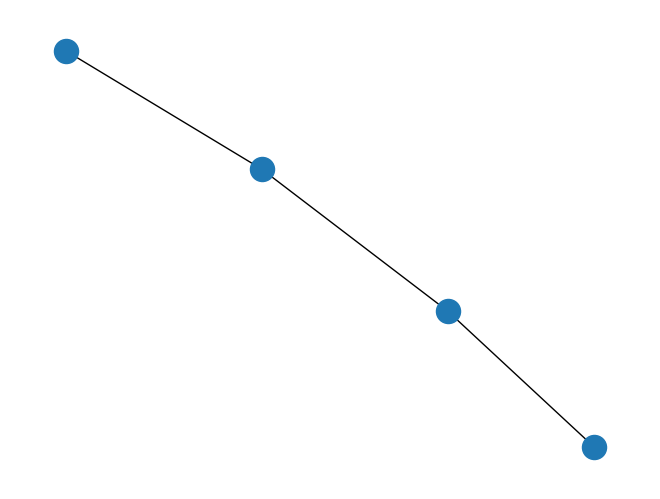

In [ ]:
# 그래프 출력하기
nx.draw(G)

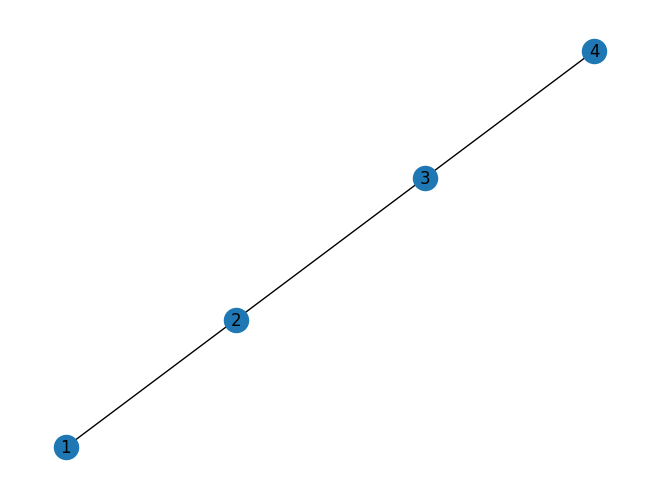

In [ ]:
nx.draw(G, with_labels=True)

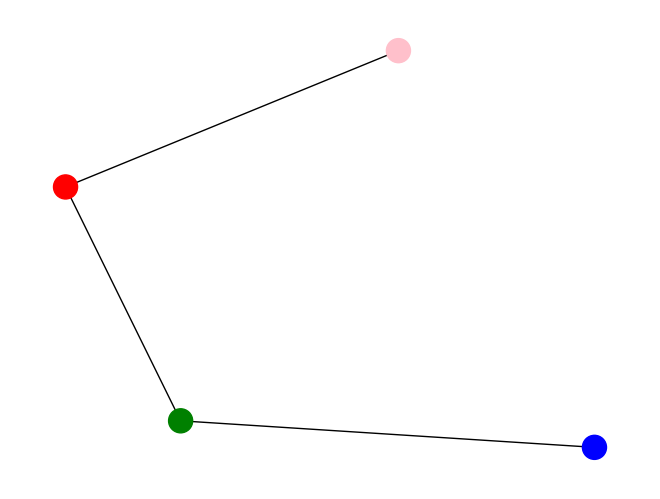

In [ ]:
nx.draw(G, node_color=['blue', 'green', 'red', 'pink'])

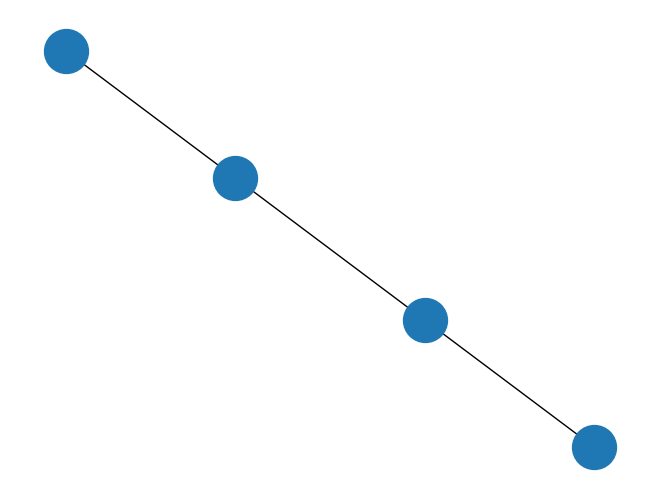

In [ ]:
nx.draw(G, node_size=1000)

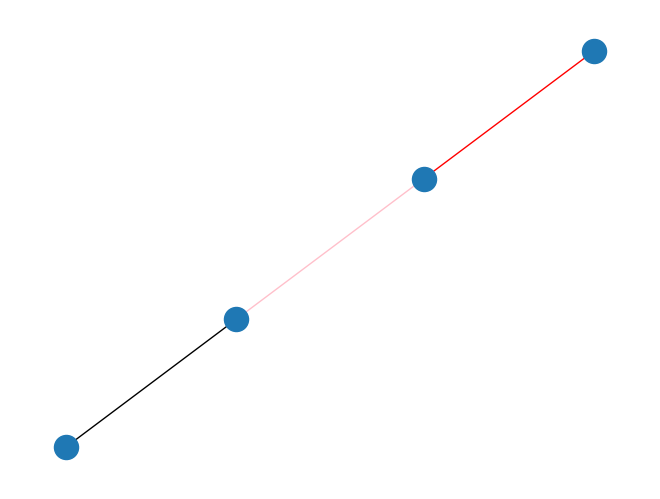

In [ ]:
nx.draw(G, edge_color=["red", "pink", "black"])

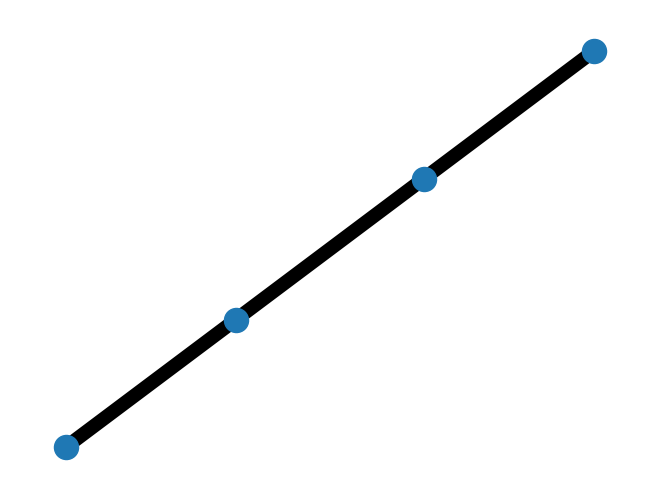

In [ ]:
nx.draw(G, width=10)

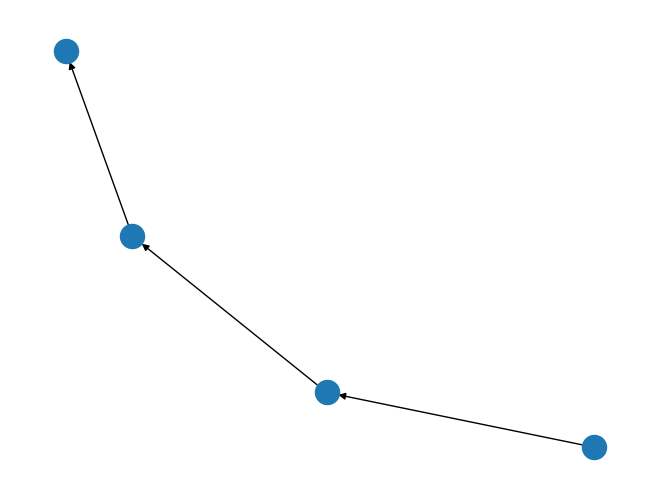

In [ ]:
# 방향성이 있는 그래프 생성
DG = nx.DiGraph()

# 여러 노드 추가
DG.add_nodes_from([1, 2, 3, 4])

# 여러 엣지 추가
DG.add_edges_from([(1, 2), (2, 3), (3, 4)])

# 그래프 그리기
nx.draw(DG, arrowstyle='-|>')

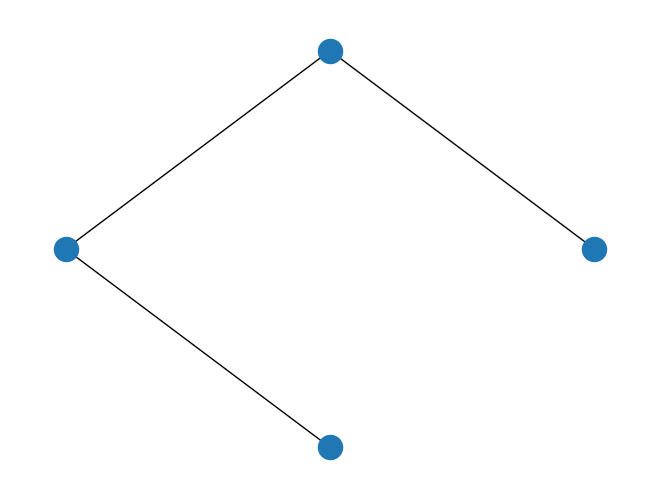

In [ ]:
nx.draw(G, pos=nx.circular_layout(G))

In [ ]:
# 패키지 불러오기
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 다운로드
os.system("apt-get install -y fonts-nanum")

# 파일 경로 설정하기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 폰트 추가하기
new_font = fm.FontEntry(fname=font_path, name="나눔고딕")
fm.fontManager.ttflist.append(new_font)

# Matplotlib 파라미터 업데이트
plt.rcParams.update({'font.size': 10, 'font.family': '나눔고딕'})

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 현재 실행 경로 변경
import os
os.chdir("/content/drive/MyDrive")

# [내 드라이브] 에 [파이썬으로 레벨 업] 폴더 생성
# os.mkdir("파이썬으로 레벨 업")

Mounted at /content/drive


In [ ]:
# requests 모듈 불러오기
import requests

# CSV 파일 데이터 가져오기
url = "https://raw.githubusercontent.com/gonyo1/colab/main/data.csv"
response = requests.get(url)
path = "파이썬으로 레벨 업/data.csv"

# 바이너리 형식으로 저장
with open(path, "wb") as f:
    f.write(response.content)

In [ ]:
# Pandas 로 데이터 불러오기
import pandas as pd
csv_path = "파이썬으로 레벨 업/data.csv"
csv_df = pd.read_csv(csv_path)

# FriendsNet 데이터 처리
csv_data = {}
columns = csv_df.columns.tolist()
name_index = columns.index("2. 이름을 입력해주세요.")

In [ ]:
def get_column_data(add):
    values = csv_df[columns[name_index + add]].tolist()
    return values

def get_values(question, result):
    values = get_column_data(question + 1)

    for idx_answer, answer in enumerate(values):
        name = csv_data["names"][idx_answer]
        names = answer.split(", ")

        try:
            result[name] += names
        except:
            result[name] = names

        result[name] = list(set(result[name]))

In [ ]:
def get_category_values(groups):
    # result 딕셔너리에 두 문항 응답 결과를 저장
    result = {}

    for idx, question in enumerate(groups):
        get_values(question, result)

    return result

In [ ]:
# 데이터 생성하기
csv_data["names"] = get_column_data(add=0)
csv_data["gender"] = get_column_data(add=1)
csv_data["인기지수"] = get_category_values([1, 2])

# 데이터 출력
print(csv_data)

In [ ]:
# 이름 변수 할당
names = csv_data["names"]

In [ ]:
# NetworkX 패키지 불러오기
import networkx as nx

# 그래프 객체 생성
G = nx.DiGraph()

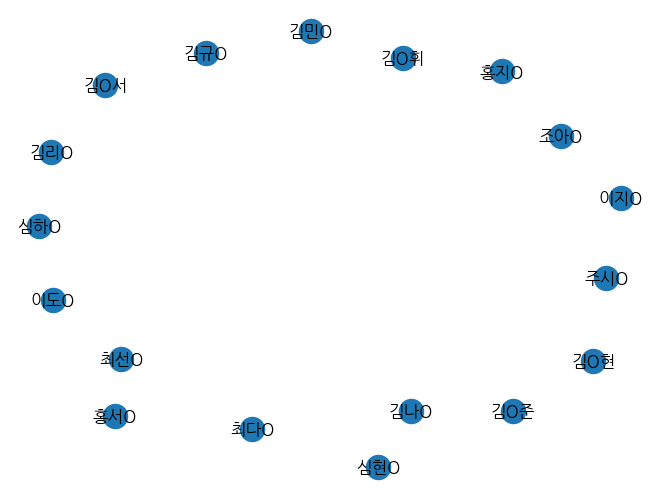

In [ ]:
# 노드 생성
# G.add_nodes_from(names)
for name in names:
    G.add_node(name)

nx.draw(G, with_labels=True, font_family="나눔고딕")

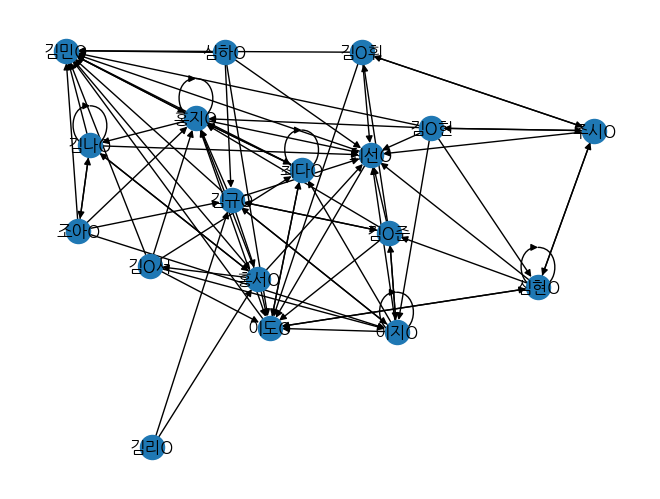

In [ ]:
# 엣지 생성
for from_name, to_names in csv_data["인기스타"].items():
    for to_name in to_names:
        if to_name != "":
            G.add_edge(from_name, to_name)

# 그래프 그리기
nx.draw(G, with_labels=True, font_family="나눔고딕")

In [ ]:
G.in_degree()

InDegreeView({'심현O': 4, '최다O': 5, '김O준': 3, '심하O': 0, '조아O': 1, '이도O': 10, '김민O': 11, '김O현': 1, '홍지O': 9, '김나O': 4, '홍서O': 4, '김O서': 1, '주시O': 3, '김규O': 5, '김O휘': 2, '최선O': 11, '이지O': 6, '김리O': 0})

In [ ]:
def set_node_size(degree):
    # node 기본 사이즈 설정
    base_size = 100

    # node 크기에 가중치 부여하기
    node_resized = list()
    for item in degree:
        size = base_size * (item[1] * 3 + 1)
        node_resized.append(size)

    return node_resized

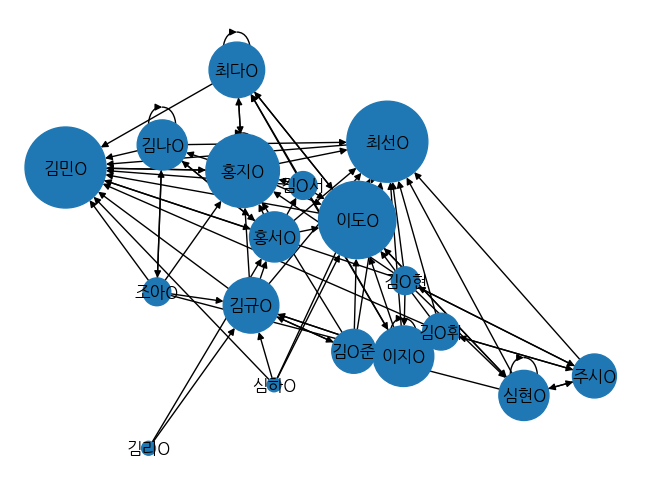

In [ ]:
# 노드 사이즈 변경하기
node_size = set_node_size(G.in_degree())

# 그래프 그리기
nx.draw(G, with_labels=True, font_family="나눔고딕", node_size=node_size)

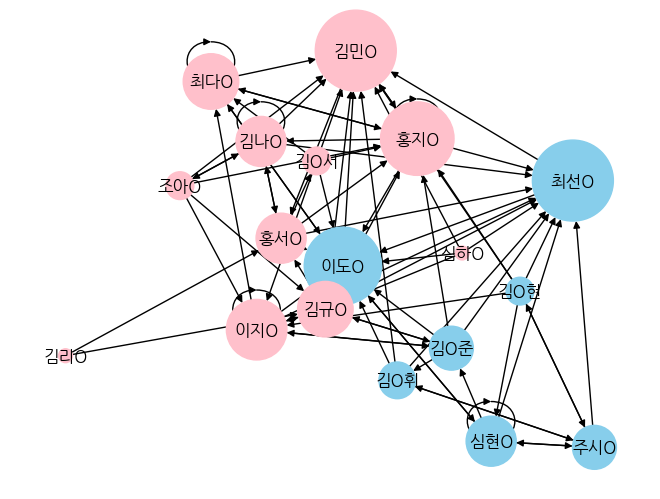

In [ ]:
def set_node_color(degree):
    # 학생 성별 기준 노드 색 정하기
    node_color = []

    for item in degree:
        name = item[0]
        index = csv_data["names"].index(name)
        data = csv_data["gender"][index]

        # 성별에 따라 색상변경하기
        if data == "남":
            color = "skyblue"
        else:
            color = "pink"

        node_color.append(color)

    return node_color

# 노드 색 변경하기
node_color = set_node_color(G.in_degree())

# 그래프 그리기
nx.draw(G, with_labels=True, font_family="나눔고딕",
        node_size=node_size, node_color=node_color)